In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

np.set_printoptions(precision=4, suppress=True)

(2, 100)

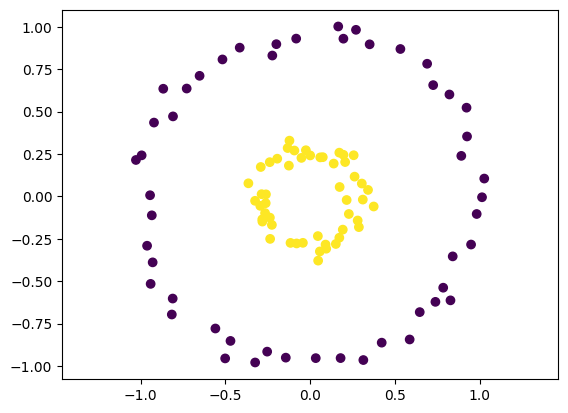

In [18]:
np.random.seed(1)

n = 100
X, y = make_circles(n_samples=n, factor=0.3, noise=0.05)
X = X.T
X.shape

_ = plt.scatter(*X, c=y)
_ = plt.axis("equal")

# normal PCA (don't expect any compression)

In [36]:
C = X @ X.T

eigenvalues, eigenvectors = np.linalg.eigh(C)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

np.cumsum(eigenvalues) / sum(eigenvalues)

array([0.5122, 1.    ])

In [37]:
k = 2
W = eigenvectors[:, :k]

np.float64(5.811892936558756e-17)

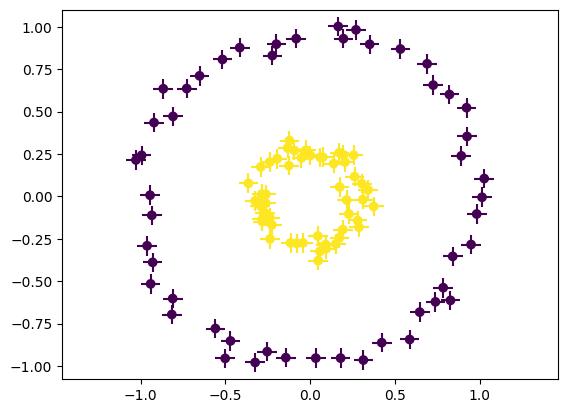

In [38]:
coefficients = X.T @ W
X_ = (coefficients @ W.T).T

np.sqrt(np.mean((X - X_) ** 2))  # rmse

_ = plt.scatter(*X, c=y)
_ = plt.scatter(*X_, marker='+', s=200, c=y)
_ = plt.axis("equal")